### Homework 02
#### Benjamin Fry (bfry2@jhu.edu)
#### Advanced Seminar in Membrane Structure, Function, and Pharmacology
#### 09/20/21

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Question 1
Record delta G values from table 2 with corresponding m

In [2]:
m = [1, 2, 3, 4, 5, 6]
dG_from_bilayer = [3.17, 3.44, 4.05, 4.81, 5.28, 6.10]

Fit data to line and report fitted parameters with standard error.

In [3]:
guess_slope_int = [3/5, 2.5]
def linear_fit(x, m, b):
    return m*x + b
popt, pcov = curve_fit(linear_fit, [x+1 for x in m], dG_from_bilayer, guess_slope_int)
slope = popt[0]
perr = np.sqrt(np.diag(pcov))
print(f"slope: {popt[0]:0.2f} ± {perr[0]:0.2f}")
print(f"intercept: {popt[1]:0.2f} ± {perr[1]:0.2f}")

slope: 0.60 ± 0.04
intercept: 1.78 ± 0.18


Recreate Paper Figure 1

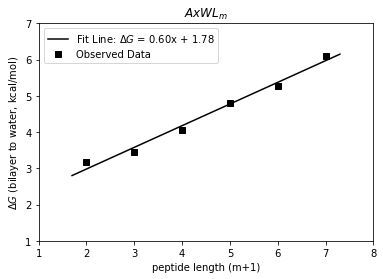

In [4]:
fit_x_data = np.linspace(1.7, 7.3, 1000)
fit_y_data = linear_fit(fit_x_data, *popt)
plt.plot(fit_x_data, fit_y_data, 'k')
plt.plot([x + 1 for x in m], dG_from_bilayer, 'sk')
plt.axis([1, 8, 1, 7])
plt.ylabel("$\Delta G$ (bilayer to water, kcal/mol)")
plt.xlabel("peptide length (m+1)");
plt.title("$AxWL_m$");
plt.legend((f"Fit Line: $\Delta G$ = {popt[0]:.2f}x + {popt[1]:.2f}", "Observed Data"));

### Question 2
calculate energy of protonating the carboxy terminus at ph 8.0

Start by recording the free energy change for GLY, ALA, SER, and THR (uncharged residues) and calculating average difference between the transition from pH 8 to pH 2 to get free energy of protonation.

In [5]:
labels = ["GLY", "ALA", "SER", "THR"]
dG_8 = [4.24, 4.08, 4.12, 4.11]
dG_2 = [6.70, 6.94, 6.94, 6.67]

Calculate the average diffrence and output findings.<br>
protonation_energy = dG_protonated - dG_unprotonated

In [6]:
dG_diff = sum([y - x for x,y in zip(dG_8, dG_2)])/len(labels)
print(f"Free energy of protonation of COO: {dG_diff} kcal/mol")

Free energy of protonation of COO: 2.675 kcal/mol


### Question 3
Define a function to calculate residue delta G given the delta G of the residue in the pentapeptide, the all leucine pentapeptide, and the ddG of leucine calculated as the slope of the plot in question 1 as reported in the paper.

In [7]:
def calculate_residue_deltaG(dG_ph8_WLXLL, dG_ph8_WLLLL, ddG_Leu):
    return ddG_Leu + (dG_ph8_WLXLL - dG_ph8_WLLLL)

Record free energies for calculation from table 1 and slope as reported in paper.

In [8]:
ddG_leu = 0.56 #slope of fit in figure 1 as reported by paper.
dG_ph8_WLMLL = 4.48
dG_ph8_WLLLL = 4.81
methionine_residue_dG = calculate_residue_deltaG(dG_ph8_WLMLL, dG_ph8_WLLLL, ddG_leu)
print(f"Delta G of Methionine: {methionine_residue_dG:0.3f} kcal/mol")

Delta G of Methionine: 0.230 kcal/mol


### Question 4

In [9]:
def calculate_residue_deltaG_ph2(dG_ph2_WLXLL, dG_ph8_WLLLL, ddG_Leu, dG_COO):
    return ddG_Leu + (dG_ph2_WLXLL - (dG_ph8_WLLLL - dG_COO))

In [10]:
ddG_leu = 0.56 #slope of fit in figure 1 as reported by paper.
dG_COO = -2.68 #free energy change of protonating COO.
dG_ph2_WLRLL = 6.12 
dG_ph8_WLLLL = 4.81
arg_residue_dG = calculate_residue_deltaG_ph2(dG_ph2_WLRLL, dG_ph8_WLLLL, ddG_leu, dG_COO)
print(f"Delta G of Arginine: {arg_residue_dG:0.3f} kcal/mol")

Delta G of Arginine: -0.810 kcal/mol


### Question 5
Create lookup table for deltaG values at pH8<br>
Swap signs from table 1 to get water to bilayer partitioning.

In [11]:
dG_ph8 = {
    "A": 0.17,
    "R": 0.81,
    "N": 0.42,
    "D": 1.23,
    "C":  -0.24,
    "Q": 0.58,
    "E": 2.02,
    "G": 0.01,
    "H": 0.17,
    "I":  -0.31,
    "L":  -0.56,
    "K": 0.99,
    "M":  -0.23,
    "F":  -1.13,
    "P": 0.45,
    "S": 0.13,
    "T": 0.14,
    "W":  -1.85,
    "Y":  -0.94,
    "V": 0.07
}

Create string containing name

In [12]:
myName = "BENJAMIN FRY"

Iterate through string, skipping letters that don't correspond to one letter codes. Sum free energy of interface partitioning.

In [13]:
energy_sum = 0
for c in myName:
    try:
        energy_sum += dG_ph8[c]
    except(KeyError):
        continue

In [14]:
def exclamation(dG):
    if dG > 0:
        return "I love the water"
    elif dG < 0:
        return "I love the interface"
    else:
        return "I love both the water and the interface"
    
output_string = f"{myName}'s water to bilayer DG is {'+' if energy_sum > 0 else ''}{energy_sum:0.2f} kcal/mol. {exclamation(energy_sum)}!"
print(output_string)

BENJAMIN FRY's water to bilayer DG is +1.23 kcal/mol. I love the water!


Recalculate energy for name peptide at pH = 2

In [15]:
dG_ph2 = {
    "A": 0.17,
    "R": 0.81,
    "N": 0.42,
    "D": -0.07,
    "C":  -0.24,
    "Q": 0.58,
    "E": -0.01,
    "G": 0.01,
    "H": 0.96,
    "I":  -0.31,
    "L":  -0.56,
    "K": 0.99,
    "M":  -0.23,
    "F":  -1.13,
    "P": 0.45,
    "S": 0.13,
    "T": 0.14,
    "W":  -1.85,
    "Y":  -0.94,
    "V": 0.07
}
energy_sum = 0
for c in myName:
    try:
        energy_sum += dG_ph2[c]
    except(KeyError):
        continue
output_string = f"{myName}'s water to bilayer DG is {'+' if energy_sum > 0 else ''}{energy_sum:0.2f} kcal/mol. {exclamation(energy_sum)}!"
print(output_string)

BENJAMIN FRY's water to bilayer DG is -0.80 kcal/mol. I love the interface!


At pH2, this peptide would associate with the interface while it would prefer the water at ph8

### Question 6
Record concentrations, convert to milliMolar

In [16]:
C_vesicles = 1 #mM
#C_peptide_ves = 30 * 10**-3 #mM
C_peptide_ves = 3 * 10**-3 #mM after correction from Lucas

#C_peptide_aq = 18.5 * 10**-6 #mM
C_peptide_aq = 1.96 * 10**-3 #mM after correction from Lucas

C_water = 55.3 * 10 ** 3 #mM

T = 25 + 273.15 #Temp in K
R = 1.985 * 10**-3 #R in kcal/mol*K
pH = 8.0

Calculate Delta G using experimental parameters via equilibrium constant of partitioning

In [17]:
K_x = (C_peptide_ves * C_vesicles) / (C_peptide_aq * C_water)
deltaG = -R*T*np.log(K_x)
print(f"Delta G of Partitioning for WLXLL Peptide: {deltaG:0.3f} kcal/mol")

Delta G of Partitioning for WLXLL Peptide: 6.211 kcal/mol


The unknown residue is TRP since this is the residue with a free energy of partitioning (6.10 +/- 0.02) at pH=8.0 that falls closest to 6.211

Therefore the sequence of the peptide is AcWLWLL

### Question 7
Completed [form](https://docs.google.com/forms/d/e/1FAIpQLScTVdMzr12veKo8St5rNyxWlSG2nC-kDo7Zm_tApGkOWrta9Q) 5 times for 5 different TIBS Articles.